# Women in Olympics

#### Author 
Dharini Sudarsan

#### Project Motivation
This project is part of Udacity Data Science Nano Degree Program.

#### Dataset
https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

#### Libraries

- Numpy
- Pandas
- Seaborn
- Matplotlib

#### Article posted on Medium
https://medium.com/@dharinisudarsan/women-in-olympics-74b6cba14abf

## Business Understanding

The questions we answer here are:
1) Which countries have had the most women representation over all the years of the Olympics? <br>
2) How has the particpation by women over the years? <br>
3) Do women contribute medals more during summer olympics or winter olympics? <br> 

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Loading data

In [121]:
# Reading data from downloaded files
data = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

## Data Understanding

In [122]:
data.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
179037,89976,Toshimitsu Otsubo,M,22.0,169.0,67.0,Japan,JPN,1968 Winter,1968,Winter,Grenoble,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN
49027,25262,Olga Valeryevna Danilova,F,21.0,168.0,56.0,Unified Team,EUN,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Women's 30 kilometres,NaN
236051,118353,Toshiyuki Tanaka,M,27.0,170.0,65.0,Japan,JPN,2012 Summer,2012,Summer,London,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",NaN


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [124]:
regions.sample(3)

,NOC,region,notes
182,SMR,San Marino,NaN
109,KOR,South Korea,NaN
73,GAM,Gambia,NaN


Content:
The file athlete_events.csv contains 271116 rows and 15 columns; Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are the following:

* ID - Unique number for each athlete;
* Name - Athlete's name;
* Sex - M or F;
* Age - Integer;
* Height - In centimeters;
* Weight - In kilograms;
* Team - Team name;
* NOC - National Olympic Committee 3-letter code;
* Games - Year and season;
* Year - Integer;
* Season - Summer or Winter;
* City - Host city;
* Sport - Sport;
* Event - Event;
* Medal - Gold, Silver, Bronze, or NA.

## Data Preparation

First, we join the athlete data with region data to get the country/region name

In [125]:
# Combining athlete data with regions mapping
df = pd.merge(data, regions, on='NOC', how='left')

In [126]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


We then remove the columns that we do not require for answering the above questions, especially Age, Height, Weight which have many nulls

In [127]:
df = df.drop(['Age', 'Height', 'Weight', 'notes', 'NOC', 'Team'], axis=1)

Checking how many nulls in each column

In [128]:
print(df.isnull().sum())

ID             0
Name           0
Sex            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
dtype: int64


Medals have a NaN in about 231333 rows. NaN in Medals indicate no win, hence filling na with 'None'

In [129]:
df['Medal'].fillna('None', inplace = True)

 ## Modelling and Evaluation

### Q1: Which countries have had the most women representation?

In [130]:
# Getting count of women particpants by country
df_q1_F = df[df.Sex == 'F']
df_q1_F = df_q1_F.groupby(by=['region'])['ID'].nunique().sort_values(ascending=False)
df_q1_F[:10]

region
USA          2613
Germany      2098
Russia       1799
Canada       1611
UK           1565
China        1516
Australia    1283
Japan        1264
France       1157
Italy        1032
Name: ID, dtype: int64

In [131]:
# Getting count of all participants by country
df_q1_all = df.groupby(by=['region'])['ID'].nunique()

# Joining with only Female dataset to calculate %
df_q1 = pd.merge(df_q1_F, df_q1_all, on='region', how='left')
df_q1['percentage_of_women'] = df_q1['ID_x']*100/df_q1['ID_y']
df_q1 = df_q1.drop(['ID_x', 'ID_y'], axis=1).sort_values('percentage_of_women', axis=0, ascending=False)

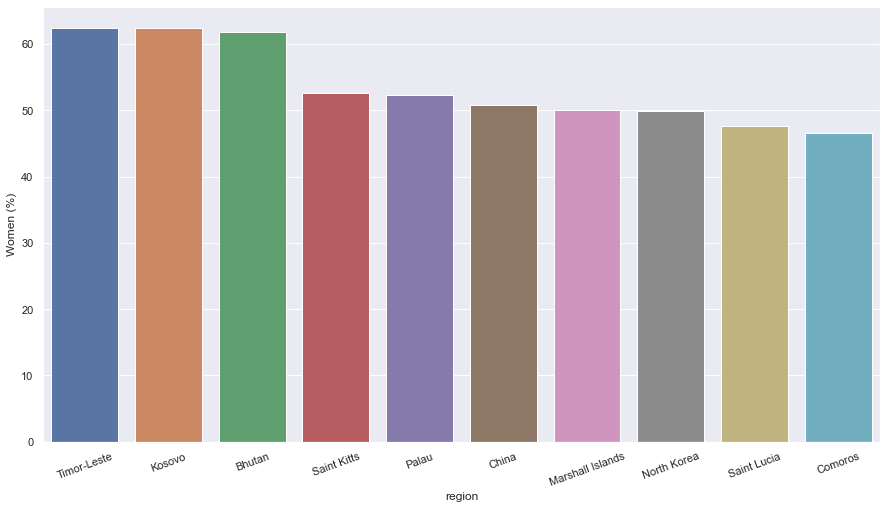

In [132]:
# Visualization
n = 10
sns.set(rc = {'figure.figsize':(n+5,8)}) 
plt.xticks(rotation=20)
sns.barplot(x=df_q1.index[:n], y=df_q1['percentage_of_women'][:n])
plt.ylabel("Women (%)")
plt.show()

In [133]:
# lowest percentages
df_q1['percentage_of_women'][-10:]

region
Uruguay         7.650273
Syria           5.825243
Iran            5.703422
Afghanistan     3.883495
Monaco          3.658537
Qatar           3.546099
Iraq            3.092784
Pakistan        3.030303
Saudi Arabia    2.684564
Kuwait          1.562500
Name: percentage_of_women, dtype: float64

In [134]:
# Women particpants from China
df_q1_F[df_q1_F.index == 'China']

region
China    1516
Name: ID, dtype: int64

### Q2: How does the women to men ratio trend over the years?

In [135]:
# Getting count of women particpants by Year
df_q2 = df[df.Sex == 'F']
df_q2 = df_q2.groupby(by=['Year'])['ID'].nunique()

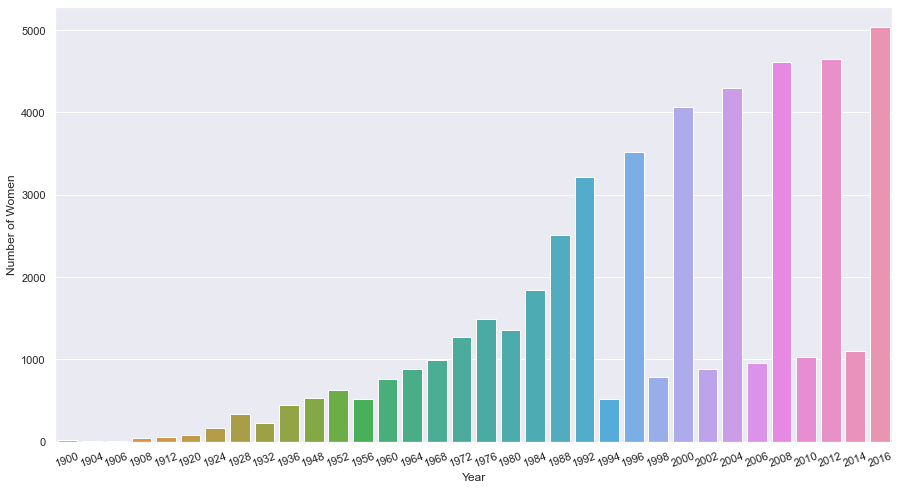

In [136]:
# Plotting
sns.set(rc = {'figure.figsize':(15,8)}) 
plt.xticks(rotation=20)
sns.barplot(x=df_q2.index, y=df_q2);
plt.ylabel("Number of Women")
plt.show()

### Q3: Do women contribute medals more during summer olympics or winter olympics? 

In [137]:
# Getting count of women particpants by Season (after year 1994)
df_q3_F = df[df.Year >= 1994]
df_q3_F = df_q3_F[df_q3_F.Sex == 'F']
df_q3_F = df_q3_F[df_q3_F.Medal != 'None']
df_q3_F = df_q3_F.groupby(by=['Season'])['ID'].nunique()

In [138]:
# Getting count of all particpants by Season (after year 1994)
df_q3_all = df[df.Year >= 1994]
df_q3_all = df_q3_all[df_q3_all.Medal != 'None']
df_q3_all = df_q3_all.groupby(by=['Season'])['ID'].nunique()

# Joining to only female dataset and calculating percentage
df_q3 = pd.merge(df_q3_F, df_q3_all, on='Season', how='left')
df_q3['percentage_won_by_women'] = df_q3['ID_x']*100/df_q3['ID_y']
df_q3 = df_q3.drop(['ID_x', 'ID_y'], axis=1)

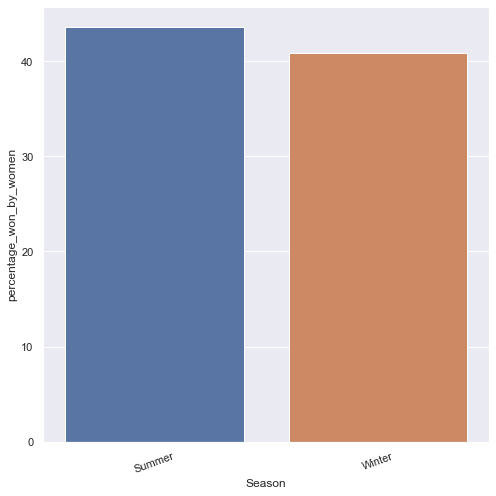

In [139]:
# Plotting
sns.set(rc = {'figure.figsize':(8,8)}) 
plt.xticks(rotation=20)
sns.barplot(x=df_q3.index, y=df_q3['percentage_won_by_women']);
plt.ylabel("percentage_won_by_women")
plt.show()

In [140]:
# Getting numbers
df_q3

,percentage_won_by_women
Season,
Summer,43.559939
Winter,40.821918
